In [1]:
import data
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
import seaborn

%matplotlib inline

In [2]:
columns_needed = ('TUCASEID', 'TRTALONE', 'TRTCHILD', 'TRTFAMILY',
                  'TRTFRIEND', 'TRTSPONLY', 'TRTSPOUSE', 'TRTALONE_WK', )
column_names = ('idnum', 'numofchildren', 'numofpeopleinhouse', 'alonetime', 'timewithkids')
df1 = pd.read_table('data/atusresp_2014.dat', sep=',', usecols=columns_needed)
df1 = df1.rename(columns={'TUCASEID':"idnum"})
df1.head(5)

,idnum,TRTALONE,TRTALONE_WK,TRTCHILD,TRTFAMILY,TRTFRIEND,TRTSPONLY,TRTSPOUSE
0,20140101140007,0,0,235,235,0,0,0
1,20140101140011,240,240,0,120,0,0,0
2,20140101140028,615,615,180,180,0,0,0
3,20140101140063,490,490,0,0,0,0,0
4,20140101140168,360,360,375,375,0,0,0


In [3]:
columns_need = ('TUCASEID', 'TUACTIVITY_N', 'TEWHERE', 'TUACTDUR', 'TRCODE', 'TUTIER1CODE', 'TUTIER2CODE')
df2 = pd.read_table('data/atusact_2014.dat', sep=',', usecols=columns_need)
df2 = df2.rename(columns={'TUACTIVITY_N':"activitycount", 'TEWHERE':'actloc', 
                          'TUACTDUR':'activduration', 'TUCASEID':'idnum'})
df2.head(5)

,idnum,activitycount,actloc,activduration,TUTIER1CODE,TUTIER2CODE,TRCODE
0,20140101140007,1,-1,540,1,1,10101
1,20140101140007,2,1,30,3,1,30101
2,20140101140007,3,-1,60,1,2,10201
3,20140101140007,4,13,10,18,11,181101
4,20140101140007,5,4,30,11,1,110101


In [4]:
columns_nee = ('TUCASEID', 'GEDIV', 'HEFAMINC','HRNUMHOU')
df3 = pd.read_table('data/atuscps_2014.dat', sep=',', usecols=columns_nee)
df3 = df3.rename(columns={'GEDIV': 'Region', 'HEFAMINC': 'family_income',
                        'HRNUMHOU':'num_people_in_household', 'TUCASEID':'idnum'})
df3.head()

,idnum,Region,family_income,num_people_in_household
0,20140101140005,6,7,2
1,20140101140005,6,7,2
2,20140101140007,8,1,1
3,20140101140011,2,11,2
4,20140101140011,2,11,2


In [5]:
result = df2.merge(df3, on='idnum', how='left')
result = result.merge(df1, on='idnum', how='left')
result = result.drop_duplicates()
result.index = result.idnum
result = result.drop('idnum', 1)
result

,activitycount,actloc,activduration,TUTIER1CODE,TUTIER2CODE,TRCODE,Region,family_income,num_people_in_household,TRTALONE,TRTALONE_WK,TRTCHILD,TRTFAMILY,TRTFRIEND,TRTSPONLY,TRTSPOUSE
idnum,,,,,,,,,,,,,,,,
20140101140007,1,-1,540,1,1,10101,8,1,1,0,0,235,235,0,0,0
20140101140007,2,1,30,3,1,30101,8,1,1,0,0,235,235,0,0,0
20140101140007,3,-1,60,1,2,10201,8,1,1,0,0,235,235,0,0,0
20140101140007,4,13,10,18,11,181101,8,1,1,0,0,235,235,0,0,0
20140101140007,5,4,30,11,1,110101,8,1,1,0,0,235,235,0,0,0
20140101140007,6,13,20,18,13,181301,8,1,1,0,0,235,235,0,0,0
20140101140007,7,9,90,13,1,130116,8,1,1,0,0,235,235,0,0,0
20140101140007,8,13,25,18,13,181301,8,1,1,0,0,235,235,0,0,0
20140101140007,9,1,30,12,3,120303,8,1,1,0,0,235,235,0,0,0


In [6]:
result['activitycount'].corr(result['actloc'])

-0.0010025557211047319

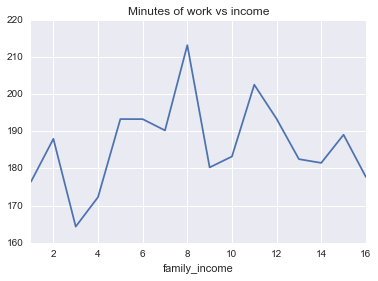

In [7]:
work_sort = result[(result.TUTIER1CODE == 5)]
work_sort = work_sort.groupby(['family_income']).mean()
(work_sort.activduration).plot(title='Minutes of work vs income')


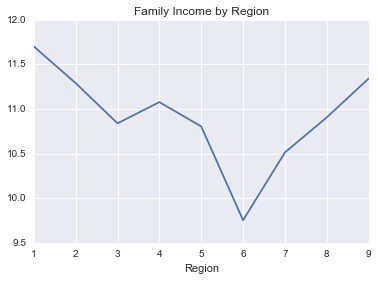

In [8]:
#region_sort = result[(result.TUTIER1CODE == 5)]
region_sort = result.groupby(['Region']).mean()
(region_sort.family_income).plot(title='Family Income by Region')

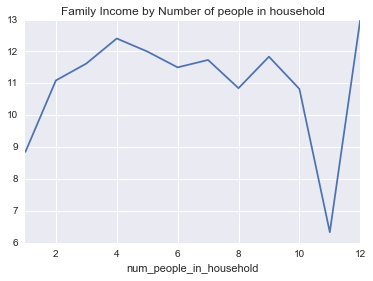

In [9]:
num_in_household_sort = result.groupby(['num_people_in_household']).mean()
(num_in_household_sort.family_income).plot(title='Family Income by Number of people in household')

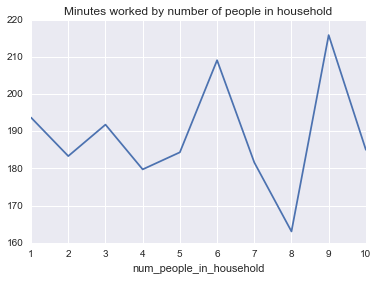

In [10]:
household_work_sort = result[(result.TUTIER1CODE == 5)]
household_work_sort = household_work_sort.groupby(['num_people_in_household']).mean()
(household_work_sort.activduration).plot(title='Minutes worked by number of people in household')

In [11]:
(df3.Region).corr(df3.family_income)

-0.031903065564928744

In [12]:
(df3.family_income).corr(df3.num_people_in_household)

0.13301274103556651

In [24]:
grouped_by_region = result[(result.TRTALONE_WK > 0)]
grouped_by_region = result.groupby(['Region']).mean()
grouped_by_region

,activitycount,actloc,activduration,TUTIER1CODE,TUTIER2CODE,TRCODE,family_income,num_people_in_household,TRTALONE,TRTALONE_WK,TRTCHILD,TRTFAMILY,TRTFRIEND,TRTSPONLY,TRTSPOUSE
Region,,,,,,,,,,,,,,,
1,12.076202,3.883545,80.425088,8.751697,3.361316,87856.583803,11.699111,2.685438,330.569079,367.679319,174.775600,321.167129,56.518214,96.204513,182.732479
2,11.935339,4.052720,83.043381,8.930669,3.386861,89648.639837,11.288372,2.724389,339.792293,373.807799,185.435196,309.924467,53.796214,78.349362,154.696050
3,11.777112,3.948351,82.924500,8.842982,3.506327,88783.843346,10.838111,2.656962,329.129080,359.018168,179.349672,312.543195,56.333828,84.686076,160.255081
4,11.730323,3.879274,82.735914,8.773245,3.354724,88071.165513,11.075887,2.731814,299.505432,330.685110,202.073384,338.983758,54.027745,91.236021,177.608638
5,11.460618,3.951730,85.412514,8.811838,3.456174,88467.270069,10.803423,2.530234,325.655423,362.244327,159.427241,302.044984,54.534583,90.602520,164.685940
6,11.406126,3.984310,85.185497,8.778695,3.410705,88131.063208,9.753097,2.571429,316.046168,344.838075,186.367615,318.292095,53.913070,81.578110,161.303431
7,11.533998,4.076616,86.099920,8.868316,3.354709,89021.764804,10.512410,2.782921,298.726696,337.006265,179.772306,323.226536,49.611612,87.665682,156.557342
8,11.695538,3.946007,82.904012,8.678978,3.413198,87134.513061,10.904699,2.830959,305.904387,349.938820,205.421697,327.425259,47.225534,84.704162,161.369766
9,11.875615,4.045963,81.882798,8.838356,3.458195,88732.870756,11.339712,2.907389,310.911503,346.259620,187.370413,317.215446,57.933381,77.413932,159.115264


In [25]:
grouped_by_act = result.groupby(['TUTIER1CODE']).count()
grouped_by_act = grouped_by_act[:-1]
grouped_by_act

,activitycount,actloc,activduration,TUTIER2CODE,TRCODE,Region,family_income,num_people_in_household,TRTALONE,TRTALONE_WK,TRTCHILD,TRTFAMILY,TRTFRIEND,TRTSPONLY,TRTSPOUSE
TUTIER1CODE,,,,,,,,,,,,,,,
1,42546,42546,42546,42546,42546,42546,42546,42546,42546,42546,42546,42546,42546,42546,42546
2,33221,33221,33221,33221,33221,33221,33221,33221,33221,33221,33221,33221,33221,33221,33221
3,11807,11807,11807,11807,11807,11807,11807,11807,11807,11807,11807,11807,11807,11807,11807
4,2464,2464,2464,2464,2464,2464,2464,2464,2464,2464,2464,2464,2464,2464,2464
5,9938,9938,9938,9938,9938,9938,9938,9938,9938,9938,9938,9938,9938,9938,9938
6,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
7,7489,7489,7489,7489,7489,7489,7489,7489,7489,7489,7489,7489,7489,7489,7489
8,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069
9,266,266,266,266,266,266,266,266,266,266,266,266,266,266,266


In [26]:
grouped_by_income = result.groupby(['family_income']).mean()
grouped_by_income

,activitycount,actloc,activduration,TUTIER1CODE,TUTIER2CODE,TRCODE,Region,num_people_in_household,TRTALONE,TRTALONE_WK,TRTCHILD,TRTFAMILY,TRTFRIEND,TRTSPONLY,TRTSPOUSE
family_income,,,,,,,,,,,,,,,
1,10.249897,3.631144,99.727592,8.841388,3.186080,88735.395498,5.113176,2.357084,368.484097,387.276745,192.404585,269.680917,65.531599,39.276332,75.195580
2,10.517667,3.535849,94.713208,8.733791,3.264151,87667.240480,5.284048,2.049400,386.809949,393.794511,172.096055,266.796569,57.944082,48.403431,76.930703
3,10.904524,3.438412,93.987996,8.591505,3.334995,86251.865928,5.276824,1.969344,432.383934,443.810526,142.302308,251.788181,59.141459,36.804247,64.038966
4,10.755160,3.259644,92.321993,8.550605,3.187900,85827.933808,5.110178,1.920427,430.581637,446.257082,136.033594,236.790890,53.531246,37.286690,60.657651
5,10.829051,3.499076,91.650042,8.638791,3.277750,86718.749454,5.214442,2.235600,402.405542,416.583543,149.127960,265.336860,47.213098,58.627372,95.608732
6,11.193215,3.636016,90.335850,8.770790,3.190939,88029.962040,5.365743,2.254861,393.978693,409.672011,157.021307,264.082230,49.902462,50.020480,83.360674
7,11.092236,3.565318,89.149835,8.679364,3.320175,87128.773520,5.263497,2.308194,390.545043,408.906843,131.180862,265.005990,54.564319,64.686814,106.128485
8,11.362958,3.788883,85.424590,8.791552,3.453718,88264.191018,5.058255,2.310513,376.056136,401.546832,152.276910,261.297166,55.408966,64.778755,106.057863
9,11.639401,4.072876,83.796265,8.864303,3.513078,88997.768295,5.094119,2.417523,357.210916,378.701089,155.945872,294.658149,58.279105,91.556169,142.208270
